In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Leer el archivo Parquet en un DataFrame de Pandas
df = pd.read_parquet('data/data.parquet')

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

batch_size = 32
epochs = 10

# Seleccionar las columnas relevantes para la predicción
features = ['num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike',
            'num_docks_available', 'hour', 'dayofweek', 'Rain', 'Wind']
target = ['num_docks_available']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Aplicar PCA a los datos normalizados
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza explicada
X_pca = pca.fit_transform(X_scaled)

# Crear el modelo de red neuronal con menos capas y unidades
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_pca.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_pca, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluar el modelo en el conjunto de prueba
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
loss = model.evaluate(X_test_pca, y_test, verbose=0)
print("Pérdida en el conjunto de prueba:", loss)

Epoch 1/10
375158/375158 [==============================] - 831s 2ms/step - loss: 0.1005
Epoch 2/10
375158/375158 [==============================] - 840s 2ms/step - loss: 1.5023e-04
Epoch 3/10
375158/375158 [==============================] - 823s 2ms/step - loss: 9.3829e-05
Epoch 4/10
375158/375158 [==============================] - 820s 2ms/step - loss: 7.4044e-05
Epoch 5/10
375158/375158 [==============================] - 824s 2ms/step - loss: 6.2909e-05
Epoch 6/10
375158/375158 [==============================] - 5951s 16ms/step - loss: 5.7600e-05
Epoch 7/10
375158/375158 [==============================] - 835s 2ms/step - loss: 4.8611e-05
Epoch 8/10
375158/375158 [==============================] - 841s 2ms/step - loss: 4.4367e-05
Epoch 9/10
375158/375158 [==============================] - 834s 2ms/step - loss: 4.0061e-05
Epoch 10/10
375158/375158 [==============================] - 840s 2ms/step - loss: 3.7882e-05
Pérdida en el conjunto de prueba: 1.704487112874631e-05


Utilizar el modelo entrenado para realizar predicciones en el conjunto de prueba o en nuevos datos no vistos.

Si ya has entrenado el modelo y tienes los datos de prueba (X_test), puedes hacer lo siguiente

In [5]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
predictions = model.predict(X_test_pca)

93790/93790 [==============================] - 177s 2ms/step


Comparar las predicciones con las etiquetas reales: Compara las predicciones obtenidas con las etiquetas reales (ground truth) del conjunto de prueba para evaluar qué tan cerca están las predicciones de los valores reales

In [6]:
# Comparar las predicciones con las etiquetas reales
compare_results = pd.DataFrame({'Etiquetas reales': y_test.flatten(), 'Predicciones': predictions.flatten()})

Calcular métricas de evaluación: Calcula métricas de evaluación adecuadas para tu tipo de problema y datos. Por ejemplo, para un problema de regresión, puedes calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('MSE:',mse, '\n. R^"2":',r2)

MSE: 1.7044876960989197e-05 
. R^"2": 0.9999997621713438


Análisis descriptivo: Puedes realizar un análisis descriptivo adicional para tener una comprensión más completa de qué tan buenos son los resultados de la predicción. Esto puede incluir el cálculo de estadísticas descriptivas básicas, como la media, la mediana, la desviación estándar, el rango, etc.

In [12]:
# Estadísticas descriptivas de las etiquetas reales y las predicciones
describe_results = compare_results.describe()
describe_results

,Etiquetas reales,Predicciones
count,3.001257e+06,3.001257e+06
mean,1.555781e+01,1.555635e+01
std,8.465740e+00,8.468362e+00
min,0.000000e+00,-1.139092e-02
25%,9.166667e+00,9.169052e+00
50%,1.600000e+01,1.599613e+01
75%,2.191667e+01,2.191346e+01
max,9.900000e+01,9.904364e+01


Visualización de resultados: También puedes utilizar visualizaciones para comprender mejor los resultados. Por ejemplo, puedes graficar las predicciones frente a las etiquetas reales para ver la relación entre ellos.

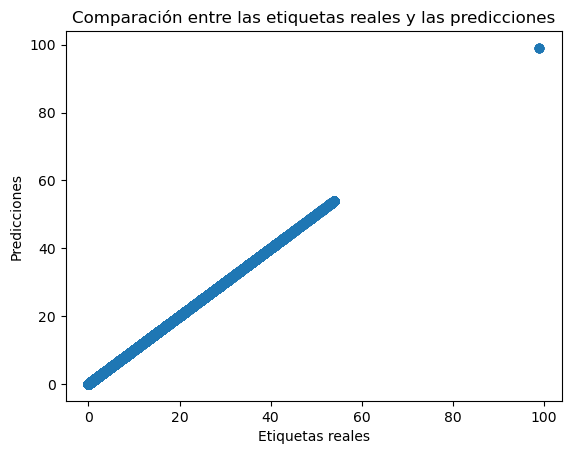

In [13]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a las etiquetas reales
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre las etiquetas reales y las predicciones')
plt.show()

In [15]:
# Crear un dataframe con las predicciones y el número real de espacios de estacionamiento disponibles
predictions_df = pd.DataFrame({'Num_dock_available_real': y_test.flatten(), 'Num_dock_available_predicted': predictions.flatten()})
predictions_df

,Num_dock_available_real,Num_dock_available_predicted
0,17.000000,16.996279
1,14.333333,14.337928
2,25.000000,24.994659
3,18.083333,18.081329
4,14.000000,13.999369
...,...,...
3001252,22.083333,22.081078
3001253,20.076923,20.074242
3001254,4.500000,4.503579
3001255,5.083333,5.081334
